## IML 3.1 - Prática com CNNs

### **Guidelines**

Utilizar os conceitos de Redes Neurais Convolucionais vistos em aula para desenvolver um modelo de classificação de imagens para o problema proposto em:

https://www.kaggle.com/datasets/kmkarakaya/logos-bk-kfc-mcdonald-starbucks-subway-none

O problema consiste em, com base em imagens da faixada de estabelecimentos, treinar um modelo para classificar tal imagem em uma das seguintes classes: ['Other', 'Starbucks', 'Subway', 'McDonalds', 'KFC', 'Burger King'].


Os modelos deverão ser desenvolvidos utilizando a plataforma Google Colab e o link da solução deve ser entregue e disponibilizado para avaliação. Durante a resolução do problema, documente o código e as decisões tomadas. O notebook deverá conter também uma análise sobre a assertividade que o modelo alcançou nos conjuntos de treinamento e validação.

### **Development**

#### Import Libraries

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Montando o Google Drive no Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Definindo o caminho para os diretórios de treino e teste
train_dir = '/content/gdrive/MyDrive/Academic/Postgraduate/MBA-Machine_Learning_in_Production/IML/[IML3] Deep Learning/project 1/train'
test_dir = '/content/gdrive/MyDrive/Academic/Postgraduate/MBA-Machine_Learning_in_Production/IML/[IML3] Deep Learning/project 1/test'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Dara Preparation

In [31]:
def create_data_generators(train_dir, target_size=(150, 150), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

#### Model

In [32]:
# Model v.1
def build_model_v1(input_shape=(150, 150, 3), num_classes=6):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [33]:
# Model v.2
def build_model_v2(input_shape=(150, 150, 3), num_classes=6):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

####  Model Training

In [34]:
# Treinamento do Modelo v.1
def train_model_v1(model, train_generator, validation_generator, epochs=20):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    return history

In [35]:
# Treinamento do Modelo v.2
def train_model_v2(model, train_generator, validation_generator, epochs=20):
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1,
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[early_stop]
    )

    return history

#### Model Evaluation

In [36]:
# Avaliação do Modelo
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Found 1393 images belonging to 6 classes.
Found 345 images belonging to 6 classes.
Epoch 1/15
43/43 [==============================] - 375s 8s/step - loss: 1.4823 - accuracy: 0.5253 - val_loss: 1.3819 - val_accuracy: 0.5656
Epoch 2/15
43/43 [==============================] - 5s 114ms/step - loss: 0.7143 - accuracy: 0.7392 - val_loss: 0.8252 - val_accuracy: 0.7250
Epoch 3/15
43/43 [==============================] - 6s 133ms/step - loss: 0.4230 - accuracy: 0.8523 - val_loss: 0.6850 - val_accuracy: 0.7594
Epoch 4/15
43/43 [==============================] - 5s 123ms/step - loss: 0.2180 - accuracy: 0.9346 - val_loss: 1.3041 - val_accuracy: 0.6719
Epoch 5/15
43/43 [==============================] - 5s 126ms/step - loss: 0.1344 - accuracy: 0.9581 - val_loss: 1.3347 - val_accuracy: 0.6719
Epoch 6/15
43/43 [==============================] - 5s 123ms/step - loss: 0.1079 - accuracy: 0.9625 - val_loss: 1.0950 - val_accuracy: 0.7563
Epoch 7/15
43/43 [==============================] - 5s 111ms/step 

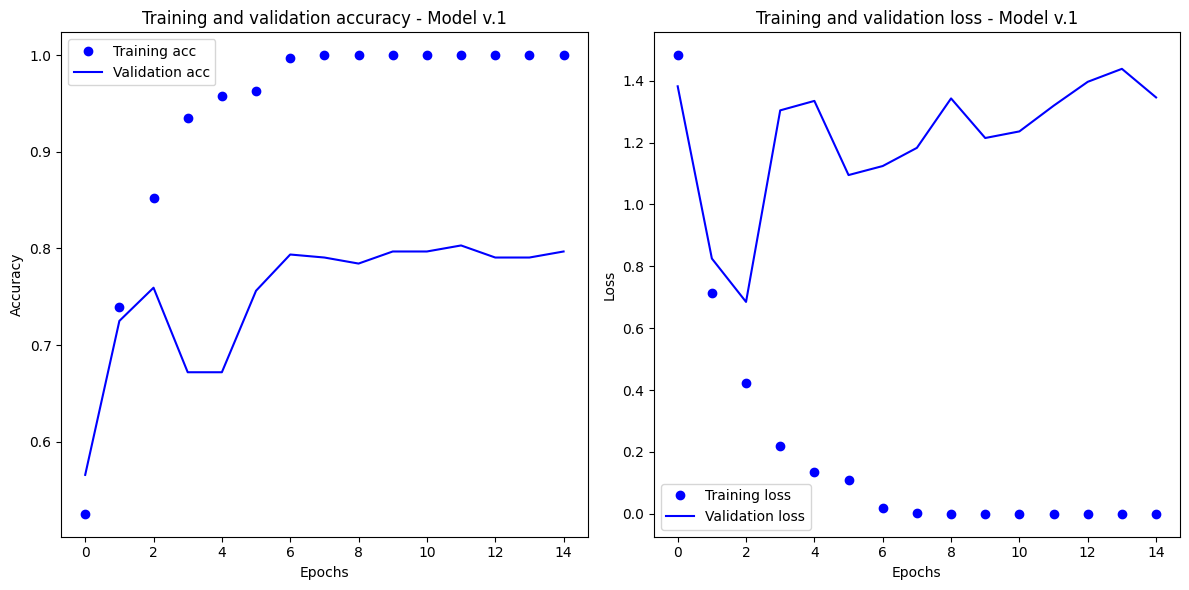

In [37]:
train_generator, validation_generator = create_data_generators(train_dir)

model_v1 = build_model_v1()
history_v1 = train_model_v1(model_v1, train_generator, validation_generator, epochs=15)
plot_training_history(history_v1, 'Model v.1')

Epoch 1/15
43/43 [==============================] - 9s 128ms/step - loss: 9.4256 - accuracy: 0.4078 - val_loss: 5.2101 - val_accuracy: 0.4719
Epoch 2/15
43/43 [==============================] - 6s 138ms/step - loss: 3.7472 - accuracy: 0.4827 - val_loss: 2.9193 - val_accuracy: 0.4906
Epoch 3/15
43/43 [==============================] - 5s 116ms/step - loss: 2.3912 - accuracy: 0.5731 - val_loss: 2.1235 - val_accuracy: 0.6313
Epoch 4/15
43/43 [==============================] - 6s 137ms/step - loss: 1.9441 - accuracy: 0.6451 - val_loss: 1.9481 - val_accuracy: 0.6313
Epoch 5/15
43/43 [==============================] - 6s 136ms/step - loss: 1.6410 - accuracy: 0.7002 - val_loss: 1.7705 - val_accuracy: 0.6438
Epoch 6/15
43/43 [==============================] - 6s 128ms/step - loss: 1.5044 - accuracy: 0.7076 - val_loss: 1.5891 - val_accuracy: 0.6969
Epoch 7/15
43/43 [==============================] - 5s 120ms/step - loss: 1.4292 - accuracy: 0.7267 - val_loss: 1.6177 - val_accuracy: 0.6406
Epoch 

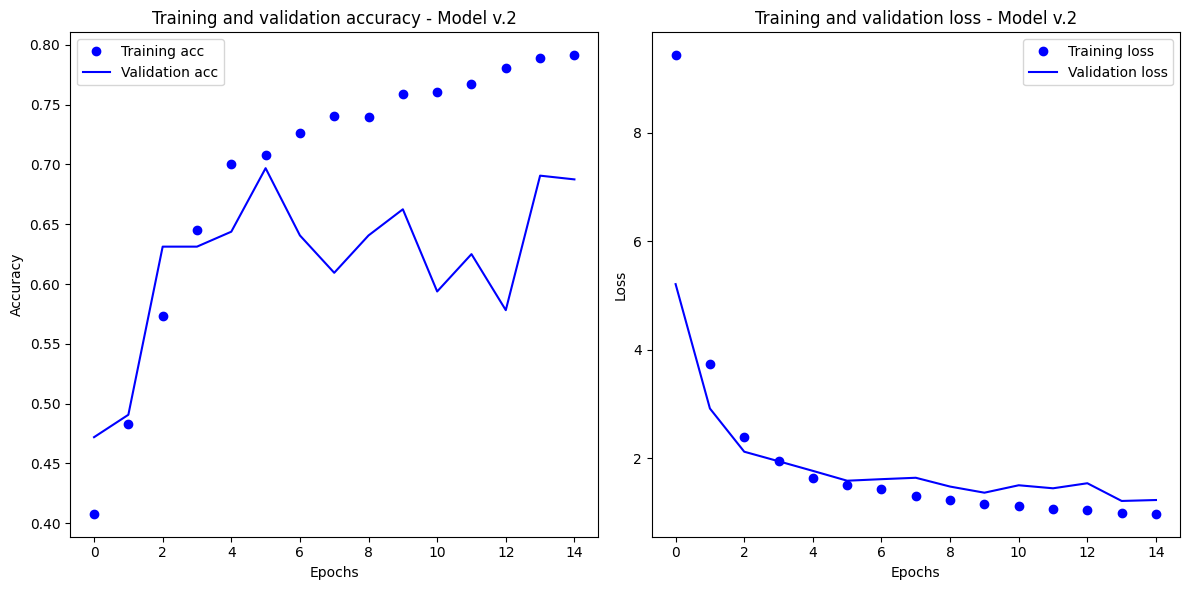

In [38]:
model_v2 = build_model_v2()
history_v2 = train_model_v2(model_v2, train_generator, validation_generator, epochs=15)
plot_training_history(history_v2, 'Model v.2')

Os modelos foram treinados em conjuntos de dados com seis classes, exibindo melhorias notáveis ao longo de 15 épocas. O **Modelo 1** alcançou 100% de acurácia de treinamento e 79,69% de acurácia de validação, enquanto o **Modelo 2** atingiu 79,13% de acurácia de treinamento e 68,75% de acurácia de validação. Ambos os modelos mostram eficácia no treinamento, embora a discrepância entre acurácias de treinamento e validação no **Modelo 1** possa indicar potencial overfitting.